#Ocorrências na Aviação Brasileira - Análise de exploração de dados


A seguinte análise tem como objetivo extrair dados e entender o comportamento de ocorrências na aviação brasileira. A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2012 a 2021 que ocorreram em solo brasileiro. A base de está desenvolvida de maneira relacional, com as tabelas contendo:

<p>OCORRÊNCIA.csv - Informações sobre as ocorrências.
<p>OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
<p>AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
<p>FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
<p>RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.


In [296]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

Importando bases de dado e contatenando conforme a coluna em comum número da ocorrência. As tabela estão correlacionadas entre si conforme o número de registro da ocorrência.

In [142]:
df_ocorrencia_main = pd.read_csv('ocorrencia.csv', sep=';', date_parser = True)
df_ocorrencia_tipo = pd.read_csv('ocorrencia_tipo.csv', sep=';', date_parser = True)
df_aeronave = pd.read_csv('aeronave.csv', sep=';', date_parser = True)
df_fator_contribuinte = pd.read_csv('fator_contribuinte.csv', sep=';', date_parser = True)
df_recomendacao = pd.read_csv('recomendacao.csv', sep=';', date_parser = True)

In [143]:
df_ocorrencia_main.drop(columns=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'], inplace=True)

In [144]:
df_ocorrencia_tipo.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia'}, inplace=True)
df_aeronave.rename(columns={'codigo_ocorrencia2': 'codigo_ocorrencia'}, inplace=True)
df_fator_contribuinte.rename(columns={'codigo_ocorrencia3': 'codigo_ocorrencia'}, inplace=True)
df_recomendacao.rename(columns={'codigo_ocorrencia4': 'codigo_ocorrencia'}, inplace=True)

In [145]:
df_merge = pd.merge(df_ocorrencia_main, df_aeronave, on="codigo_ocorrencia")
df_merge = pd.merge(df_merge, df_fator_contribuinte, on="codigo_ocorrencia")
df_merge = pd.merge(df_merge, df_ocorrencia_tipo, on="codigo_ocorrencia")
df_merge = pd.merge(df_merge, df_recomendacao, on="codigo_ocorrencia")

In [146]:
df_merge = pd.merge(df_merge, df_fator_contribuinte, on="codigo_ocorrencia")
df_merge

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,fator_nome_y,fator_aspecto_y,fator_condicionante_y,fator_area_y
0,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53492,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,BRASIL,****,06/12/2020,13:15:00,...,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,MEMÓRIA,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
53493,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,BRASIL,****,06/12/2020,13:15:00,...,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
53494,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,BRASIL,****,06/12/2020,13:15:00,...,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
53495,80073,ACIDENTE,-10.98472,-37.05166,ARACAJU,SE,BRASIL,****,06/05/2021,14:57:00,...,2021-11-19,NaN,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL


#Verificando a quantidade de valores nulos.

In [147]:
df_merge.isnull().sum()/df_merge.shape[0]*100

codigo_ocorrencia                   0.000000
ocorrencia_classificacao            0.000000
ocorrencia_latitude                 0.000000
ocorrencia_longitude                0.000000
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.000000
ocorrencia_pais                     0.000000
ocorrencia_aerodromo                0.000000
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.000000
investigacao_aeronave_liberada     15.370955
investigacao_status                 0.000000
divulgacao_relatorio_numero         0.140195
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao           0.000000
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
aeronave_matricula                  0.000000
aeronave_operador_categoria         0.000000
aeronave_tipo_veiculo               0.000000
aeronave_fabricante                 0.000000
aeronave_m

Removendo algumas colunas que possuem muitos valores nulo como investigacao_aeronave_liberada e recomendacao_dia_feedback.

Como há valores poucos valores faltantes em algumas colunas com valores inferiores 1%, torna-se necessário uma avaliação indívidual em cada uma da variáveis. 

In [148]:
df_merge.drop(['recomendacao_dia_feedback','investigacao_aeronave_liberada'],axis=1, inplace=True)

In [149]:
df_merge['aeronave_assentos'].value_counts(normalize=True).reset_index()

,index,aeronave_assentos
0,6.0,0.133362
1,1.0,0.108654
2,7.0,0.103134
3,4.0,0.102007
4,2.0,0.087813
5,14.0,0.064362
6,10.0,0.053304
7,0.0,0.050412
8,9.0,0.043935
9,8.0,0.040686


In [150]:
df_merge['divulgacao_relatorio_numero'].value_counts(normalize=True).reset_index()

,index,divulgacao_relatorio_numero
0,A-134/CENIPA/2014,0.062296
1,IG-065/CENIPA/2018,0.056943
2,A-092/CENIPA/2015,0.043278
3,A-526/CENIPA/2015,0.028471
4,A-128/CENIPA/2015,0.025270
...,...,...
550,A-002/CENIPA/2020,0.000019
551,IG-099/CENIPA/2016,0.000019
552,IG-191/CENIPA/2018,0.000019
553,A-161/CENIPA/2015,0.000019


In [151]:
df_merge['aeronave_ano_fabricacao'].value_counts(normalize=True).reset_index()

,index,aeronave_ano_fabricacao
0,2010.0,0.103679
1,2013.0,0.050779
2,2001.0,0.047813
3,0.0,0.047813
4,1983.0,0.042538
...,...,...
62,1969.0,0.000375
63,1965.0,0.000300
64,1945.0,0.000075
65,1948.0,0.000038


In [152]:
df_merge['recomendacao_conteudo'].value_counts(normalize=True).reset_index()

,index,recomendacao_conteudo
0,AVALIAR A VIABILIDADE DA IMPLANTAçãO DE UM RAD...,0.006318
1,ANALISAR A PERTINêNCIA DE SE ESTABELECER UM MO...,0.006318
2,ALERTAR OS CONTROLADORES DE TRáFEGO AéREO BRAS...,0.006318
3,ALERTAR OS CONTROLADORES DE TRáFEGO AéREO BRAS...,0.006318
4,"ANALISAR A PERTINêNCIA DE SE ESTABELECER, COM ...",0.006318
...,...,...
1112,Atuar junto à empresa Serviços Aéreos Flylog L...,0.000019
1113,Assegurar-se de que as oficinas de manutenção ...,0.000019
1114,Divulgar o presente relatório às oficinas que ...,0.000019
1115,Efetuar gestões de forma que fique assegurado ...,0.000019


In [153]:
df_merge.drop_duplicates().sum()

KeyboardInterrupt: ignored

Uma possibilidade é subsituir os valores faltantes pelo valor que mais se repete, porém como uma as variáveis são especifícas e apresentam valores caracteristicos de cada opta-se por deletar os valores as linhas faltantes. Além disso, como há poucos valores ausentes, os resultados finais serão ligeiramente afetados. 

In [154]:
#df_merge.drop(['aeronave_assentos','divulgacao_relatorio_numero','aeronave_ano_fabricacao', 'recomendacao_conteudo'],axis=1, inplace=True)
df_merge.dropna(inplace=True)

#Tratando dados

Latitue e Longitude

In [160]:
#verificando os valores unicos
for i in df_merge.columns:
    ##print(f'\nColuna: {i}, {df_merge[i].unique()}')
    print(df_merge[i].value_counts(normalize=True).reset_index())

     index  codigo_ocorrencia
0    52265           0.062575
1    77803           0.057198
2    53340           0.043472
3    46583           0.028599
4    53488           0.025384
..     ...                ...
544  65414           0.000019
545  60732           0.000019
546  78383           0.000019
547  53545           0.000019
548  60692           0.000019

[549 rows x 2 columns]
             index  ocorrencia_classificacao
0         ACIDENTE                  0.753027
1  INCIDENTE GRAVE                  0.218618
2        INCIDENTE                  0.028354
               index  ocorrencia_latitude
0     -23.9597222222             0.062575
1    -158.711.111.11             0.057198
2            -3.7325             0.043472
3      -25.25833333              0.028599
4     -11.8961111111             0.025384
..               ...                  ...
503    -2.6758333333             0.000019
504  -65.291.666.667             0.000019
505    -27.67055556              0.000019
506       -22.13

Visto que nos valores para latitude e longitude há divergências como \t, torna-se necessário a sua remoção.

In [159]:
df_merge['ocorrencia_latitude'] = df_merge['ocorrencia_latitude'].str.replace(r'\\t',' ')
df_merge['ocorrencia_longitude'] = df_merge['ocorrencia_longitude'].str.replace(r'\\t',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [274]:
#verificando valores
#df_merge['ocorrencia_latitude'].value_counts(normalize=True)[:50]
df_merge.groupby('ocorrencia_longitude').ocorrencia_latitude.count().sort_values(ascending=False)[:50]

ocorrencia_longitude
-46.3269444444     3328
-479.186.111.11    3042
-38.7119444444     2312
 -49.32805556      1521
-44.2944444444     1350
-42.8244444444     1018
-479.161.111.11    1014
-600.625            900
-46.4730555556      786
-37.36416667        784
-488.327.777.77     768
-47.9208333333      754
-47.9744444444      726
-43.2505555556      720
-47.6919444444      700
-46.577778          675
-54.7241666667      605
-34.92277778        600
-46.28              588
-49.2208333333      576
-46.0533333333      576
-668.975            512
-52.6436111111      507
-47.577382          500
 -50.26166667       484
-39.0333333333      484
-559.983.333.33     484
-63.653333333       448
-48.3566666667      441
-60.09219310931     400
-53.465000          400
-38.94000           400
-50.4133333333      392
-65.5269444444      392
 -50.01583333       363
-49.5527777778      363
-48.4938888889      363
-54.8086111111      343
 -57.26611111       338
 -52.93833333       338
-51.1336111111     

In [290]:
def deleting_dots(num): 
  aux1 = num.split('.')
  if len(aux1) > 1:
    aux2 = aux1[0] + '.' + aux1[1]
    aux3 = ''.join(aux1[2:])
    return(aux2 + aux3)
  else:
    aux4 = '123456'
    aux4[:2] + '.' + aux4[2:]
    return(aux4)

Há alguns valores que possuem mais de um ponto como por exemplo 454545.5454.54.55. Portanto é necessário removelos e normalizalos com somente um ponto.

In [297]:
df_merge['ocorrencia_latitude'] = df_merge['ocorrencia_latitude'].apply(lambda x: deleting_dots(x))
df_merge['ocorrencia_longitude'] = df_merge['ocorrencia_longitude'].apply(lambda x: deleting_dots(x))

Removendo ** nos valores

In [300]:
df_merge = df_merge[df_merge['ocorrencia_latitude']!='***']
df_merge = df_merge[df_merge['ocorrencia_longitude']!='***']

Disturbio nos dados em latitude

In [305]:
df_merge['ocorrencia_latitude'] = df_merge['ocorrencia_latitude'].str.replace(r'\°',' ')

In [307]:
df_merge.ocorrencia_latitude.astype(float)

0       -23.435556
1       -23.435556
2       -23.435556
3       -23.435556
4       -23.435556
           ...    
53492   -33.176944
53493   -33.176944
53494   -33.176944
53495   -10.984720
53496   -10.984720
Name: ocorrencia_latitude, Length: 52437, dtype: float64

In [312]:
df_merge['ocorrencia_latitude'], df_merge['ocorrencia_longitude']

(0        -23.4355555556
 1        -23.4355555556
 2        -23.4355555556
 3        -23.4355555556
 4        -23.4355555556
               ...      
 53492       -33.176944 
 53493       -33.176944 
 53494       -33.176944 
 53495         -10.98472
 53496         -10.98472
 Name: ocorrencia_latitude, Length: 52437, dtype: object,
 0        -46.4730555556
 1        -46.4730555556
 2        -46.4730555556
 3        -46.4730555556
 4        -46.4730555556
               ...      
 53492       -53.014167 
 53493       -53.014167 
 53494       -53.014167 
 53495         -37.05166
 53496         -37.05166
 Name: ocorrencia_longitude, Length: 52437, dtype: object)

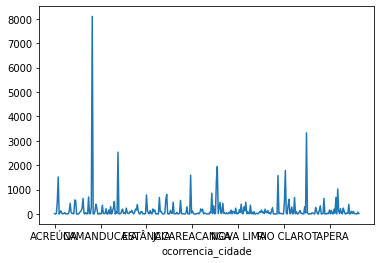

In [310]:
df_merge.groupby(['ocorrencia_cidade']).total_aeronaves_envolvidas.sum().plot()

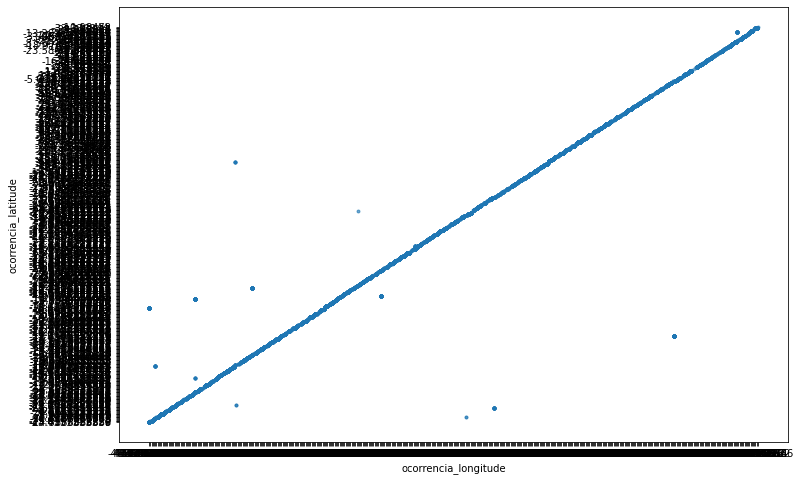

In [311]:
df_merge.plot(kind="scatter", x='ocorrencia_longitude', y='ocorrencia_latitude', alpha=0.4, s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));